In [3]:
import nengo
from nengo import spa
from nengo.synapses import filt
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline
from constants import *

rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, unitary=["ONE"], rng=rng)
number_dict = {"ONE":1, "TWO":2, "THREE":3, "FOUR":4, "FIVE":5,
               "SIX":6, "SEVEN":7, "EIGHT":8, "NINE":9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))

number_list = number_ordered.keys()
for i in range(number_range):
    print(number_list[i])
    vocab.add(number_list[i+1], vocab.parse("%s*ONE" % number_list[i]))

join_num = "+".join(number_list[0:number_range])
print(join_num)

ONE
TWO
THREE
FOUR
FIVE
SIX
SEVEN
EIGHT
ONE+TWO+THREE+FOUR+FIVE+SIX+SEVEN+EIGHT


In [8]:
c_d = np.load("data/count_fig_data.npz")
e_d = np.load("data/count_fig_env_data.npz")
t = np.load("data/count_fig_time.npz")["time"]

In [49]:
synapse = 0.005
D = 64
count_res = filt(c_d["p_count_res"], synapse, dt=0.001)
count_fin = filt(c_d["p_count_fin"], synapse, dt=0.001)
count_tot = filt(c_d["p_count_tot"], synapse, dt=0.001)
ans_assoc = filt(c_d["p_ans_assoc"], synapse, dt=0.001)
thres_ens = filt(c_d["p_thres_ens"], synapse, dt=0.001)
keys = e_d["p_keys"]
final_ans = filt(e_d["p_final_ans"], synapse, dt=0.001)
speech = filt(e_d["p_speech"], synapse, dt=0.001)

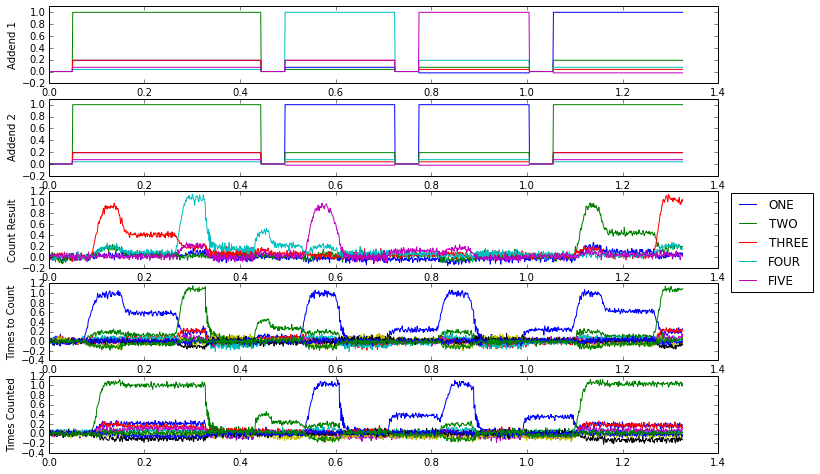

In [55]:
fig = plt.figure(figsize=(12,8))

p_key1 = fig.add_subplot(5,1,1)
p_key1.plot(t, spa.similarity(keys[:, D:], vocab)[:,:5])
p_key1.set_ylim((-0.2, 1.1))
p_key1.set_ylabel("Addend 1")

p_key2 = fig.add_subplot(5,1,2)
p_key2.plot(t, spa.similarity(keys[:, :D], vocab)[:,:5])
p_key2.set_ylim((-0.2, 1.1))
p_key2.set_ylabel("Addend 2")

p1 = fig.add_subplot(5,1,3)
p1.plot(t, spa.similarity(count_res, vocab)[:,:5])
p1.legend(vocab.keys, bbox_to_anchor=(1.15, 1.05))
p1.set_ylabel("Count Result")

p2 = fig.add_subplot(5,1,4)
p2.plot(t, spa.similarity(count_tot, vocab))
p2.set_ylabel("Times to Count")

p3 = fig.add_subplot(5,1,5)
p3.plot(t, spa.similarity(count_fin, vocab))
p3.set_ylabel("Times Counted")

In [22]:
from nengo.synapses import filt

In [16]:
filt_res = filt(count_res, 0.01, dt=0.001)

(-1.5, 1.5)

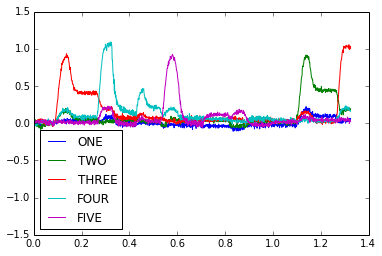

In [17]:
plt.figure()
plt.plot(t, spa.similarity(filt_res, vocab)[:,:5])
plt.legend(vocab.keys, loc='best')
plt.ylim(-1.5, 1.5)